# classifier-evaluation-using-confusion-matrix

In [37]:
import numpy as np
from numpy  import array
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv("Iris.csv") # load data
iris.drop('Id',axis=1,inplace=True) # Id column is redundant as df already assigns index

In [38]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [39]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
# First we need to split X, Y into separate sets to feed X to the scaler.
X = iris.drop('Species', axis=1)
Y = iris.Species

In [42]:
# Scaling of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print('X_scaled type is',type(X_scaled))

X_scaled type is <class 'numpy.ndarray'>


In [43]:
# As output of scaler is np array I'll transform back to df for easier exploration and plotting
X_scaled_df = pd.DataFrame(X_scaled,columns=['s_SepalLength','s_SepalWidth', 's_PetalLength','s_PetalWidth'])

In [44]:
df = pd.concat([X_scaled_df,Y],axis=1)
df.tail()

,s_SepalLength,s_SepalWidth,s_PetalLength,s_PetalWidth,Species
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica
149,0.444444,0.416667,0.694915,0.708333,Iris-virginica


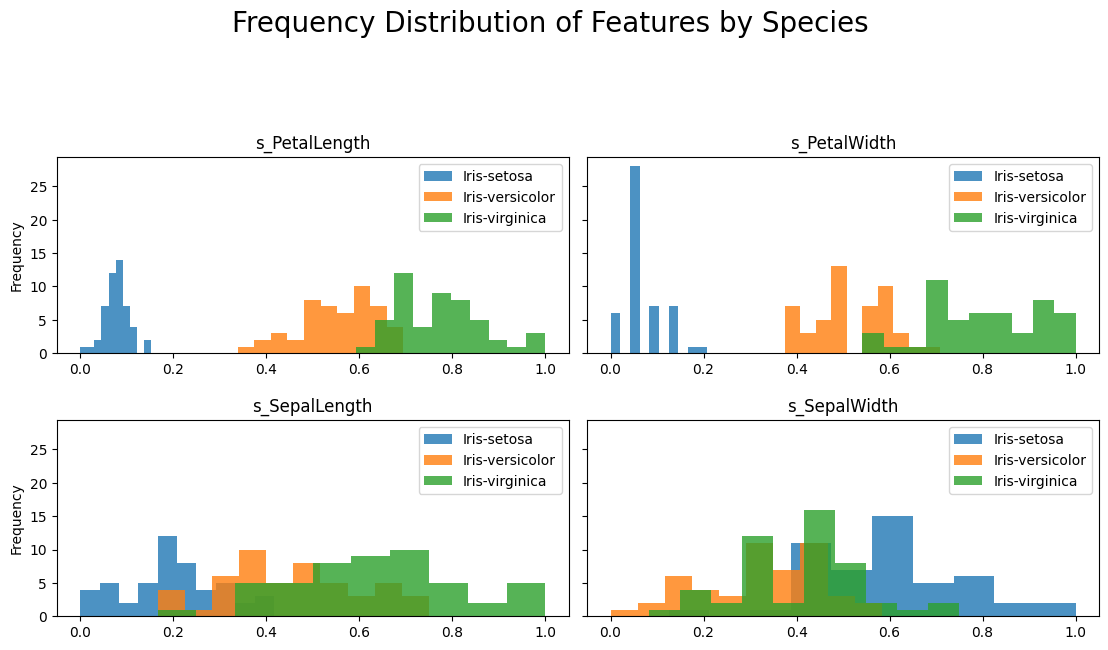

,s_SepalLength,s_SepalWidth,s_PetalLength,s_PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [45]:
# Notice x-axis on subplots are all the same for all features (0 to 1) after scaling.
fig = plt.figure(figsize=(12,7))
fig.suptitle('Frequency Distribution of Features by Species ',fontsize=20)

ax1 = fig.add_subplot(221)
df.groupby("Species").s_PetalLength.plot(kind='hist',alpha=0.8,legend=True,title='s_PetalLength')
ax2 = fig.add_subplot(222,sharey=ax1)
df.groupby("Species").s_PetalWidth.plot(kind='hist',alpha=0.8,legend=True,title='s_PetalWidth')
ax3 = fig.add_subplot(223,sharey=ax1)
df.groupby("Species").s_SepalLength.plot(kind='hist',alpha=0.8,legend=True,title='s_SepalLength')
ax4 = fig.add_subplot(224,sharey=ax1)
df.groupby("Species").s_SepalWidth.plot(kind='hist',alpha=0.8,legend=True,title='s_SepalWidth')

plt.tight_layout(pad=4, w_pad=1, h_pad=1.5)
plt.show()
X_scaled_df.describe()


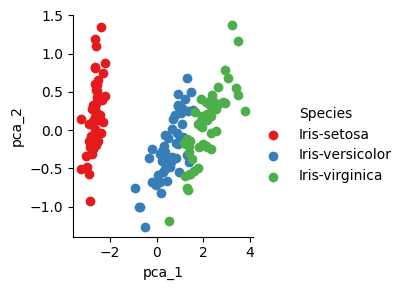

In [46]:
from sklearn.decomposition import PCA
# spliting input and target
X = iris.drop('Species',axis=1)
Y = iris.Species

pca = PCA(n_components=2).fit_transform(X) # pca output is an array
pca_df = pd.DataFrame(pca,columns=['pca_1','pca_2']) # transforming back to df
pca_Y = pd.concat([pca_df, Y],axis=1)

# The 3 species cluster nicely which is a good indication a classifier can be trained 
# at high accuracy. 
# It is also expected that accuracy of identifying setosa will be higher.

import matplotlib.pyplot as plt
import seaborn as sns
sns.FacetGrid(pca_Y, hue="Species", palette="Set1").map(plt.scatter, "pca_1", "pca_2").add_legend() # , size=6
plt.show()

In [47]:
# Let's now build a classifier and evaluate accuracy
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)
print("train sample size",x_train.shape,type(x_train))
print("test sample size",x_test.shape,type(x_test))


train sample size (105, 4) <class 'pandas.core.frame.DataFrame'>
test sample size (45, 4) <class 'pandas.core.frame.DataFrame'>


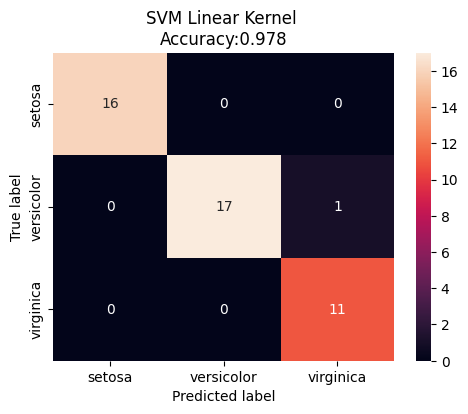

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

clf = SVC(kernel = 'linear').fit(x_train,y_train)
clf.predict(x_train)
y_pred = clf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# confusion-matrix-in-machine-learning

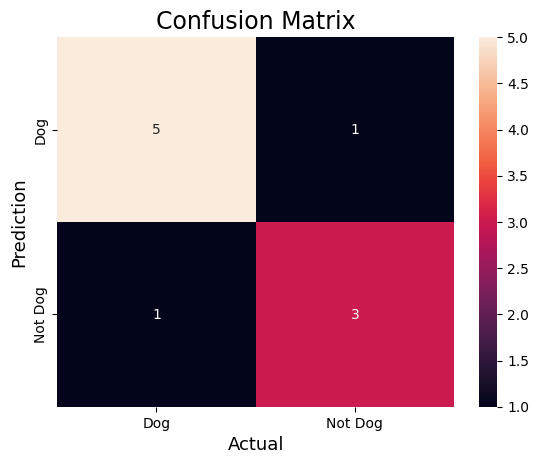

In [49]:
#Import the necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
 
#Create the NumPy array for actual and predicted labels.
actual    = np.array(
  ['Dog','Dog','Dog','Not Dog','Dog','Not Dog','Dog','Dog','Not Dog','Not Dog'])
predicted = np.array(
  ['Dog','Not Dog','Dog','Not Dog','Dog','Dog','Dog','Dog','Not Dog','Not Dog'])
 
#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)

#Plot the confusion matrix.

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Dog','Not Dog'],
            yticklabels=['Dog','Not Dog'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


## Binary Classifications for Breast Cancer

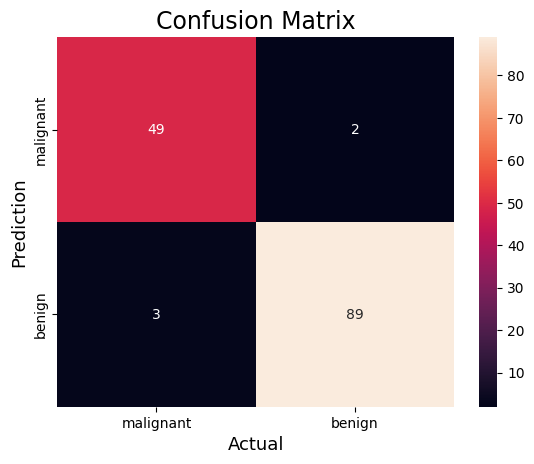

Accuracy   : 0.965034965034965
Precision : 0.978021978021978
Recall    : 0.967391304347826
F1-score  : 0.9726775956284153


In [50]:
#Import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 
# Load the breast cancer dataset
X, y= load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
 
# Train the model
tree = DecisionTreeClassifier(random_state=23)
tree.fit(X_train, y_train)
 
# preduction
y_pred = tree.predict(X_test)
 
# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 
 
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

## Multi-Class Classifications for Handwritten Digit dataset

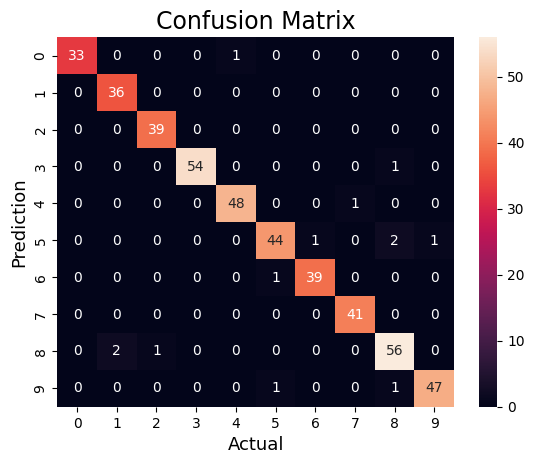

Accuracy   : 0.9711111111111111


In [51]:
#Import the necessary libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 
# Load the breast cancer dataset
X, y= load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
 
# Train the model
clf = RandomForestClassifier(random_state=23)
clf.fit(X_train, y_train)
 
# preduction
y_pred = clf.predict(X_test)
 
# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 
 
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)


# diabetes-classification

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
# load data
diabetes_data = pd.read_csv('./diabetes/train.csv')
diabetes_data.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [54]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [55]:
diabetes_data.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [56]:
diabetes_data.shape

(614, 10)

In [57]:
diabetes_data.diabetes.value_counts()

diabetes
0    400
1    214
Name: count, dtype: int64

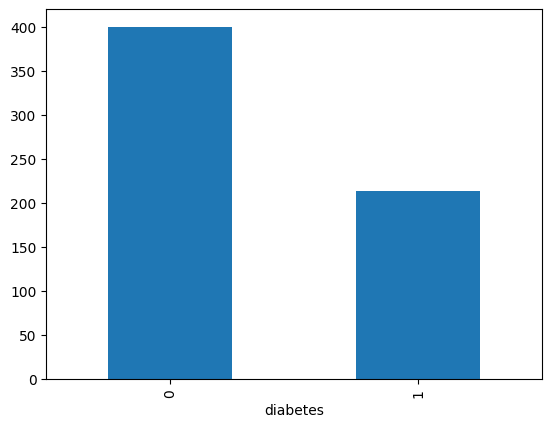

In [58]:
p = diabetes_data.diabetes.value_counts().plot(kind='bar')

In [59]:
diabetes_data = diabetes_data.drop('p_id',axis=1)
diabetes_data

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,2,112,68,22,94,34.1,0.315,26,0
1,11,143,94,33,146,36.6,0.254,51,1
2,2,93,64,32,160,38.0,0.674,23,1
3,1,120,80,48,200,38.9,1.162,41,0
4,3,128,72,25,190,32.4,0.549,27,1
...,...,...,...,...,...,...,...,...,...
609,1,189,60,23,846,30.1,0.398,59,1
610,1,84,64,23,115,36.9,0.471,28,0
611,2,92,52,0,0,30.1,0.141,22,0
612,0,125,96,0,0,22.5,0.262,21,0


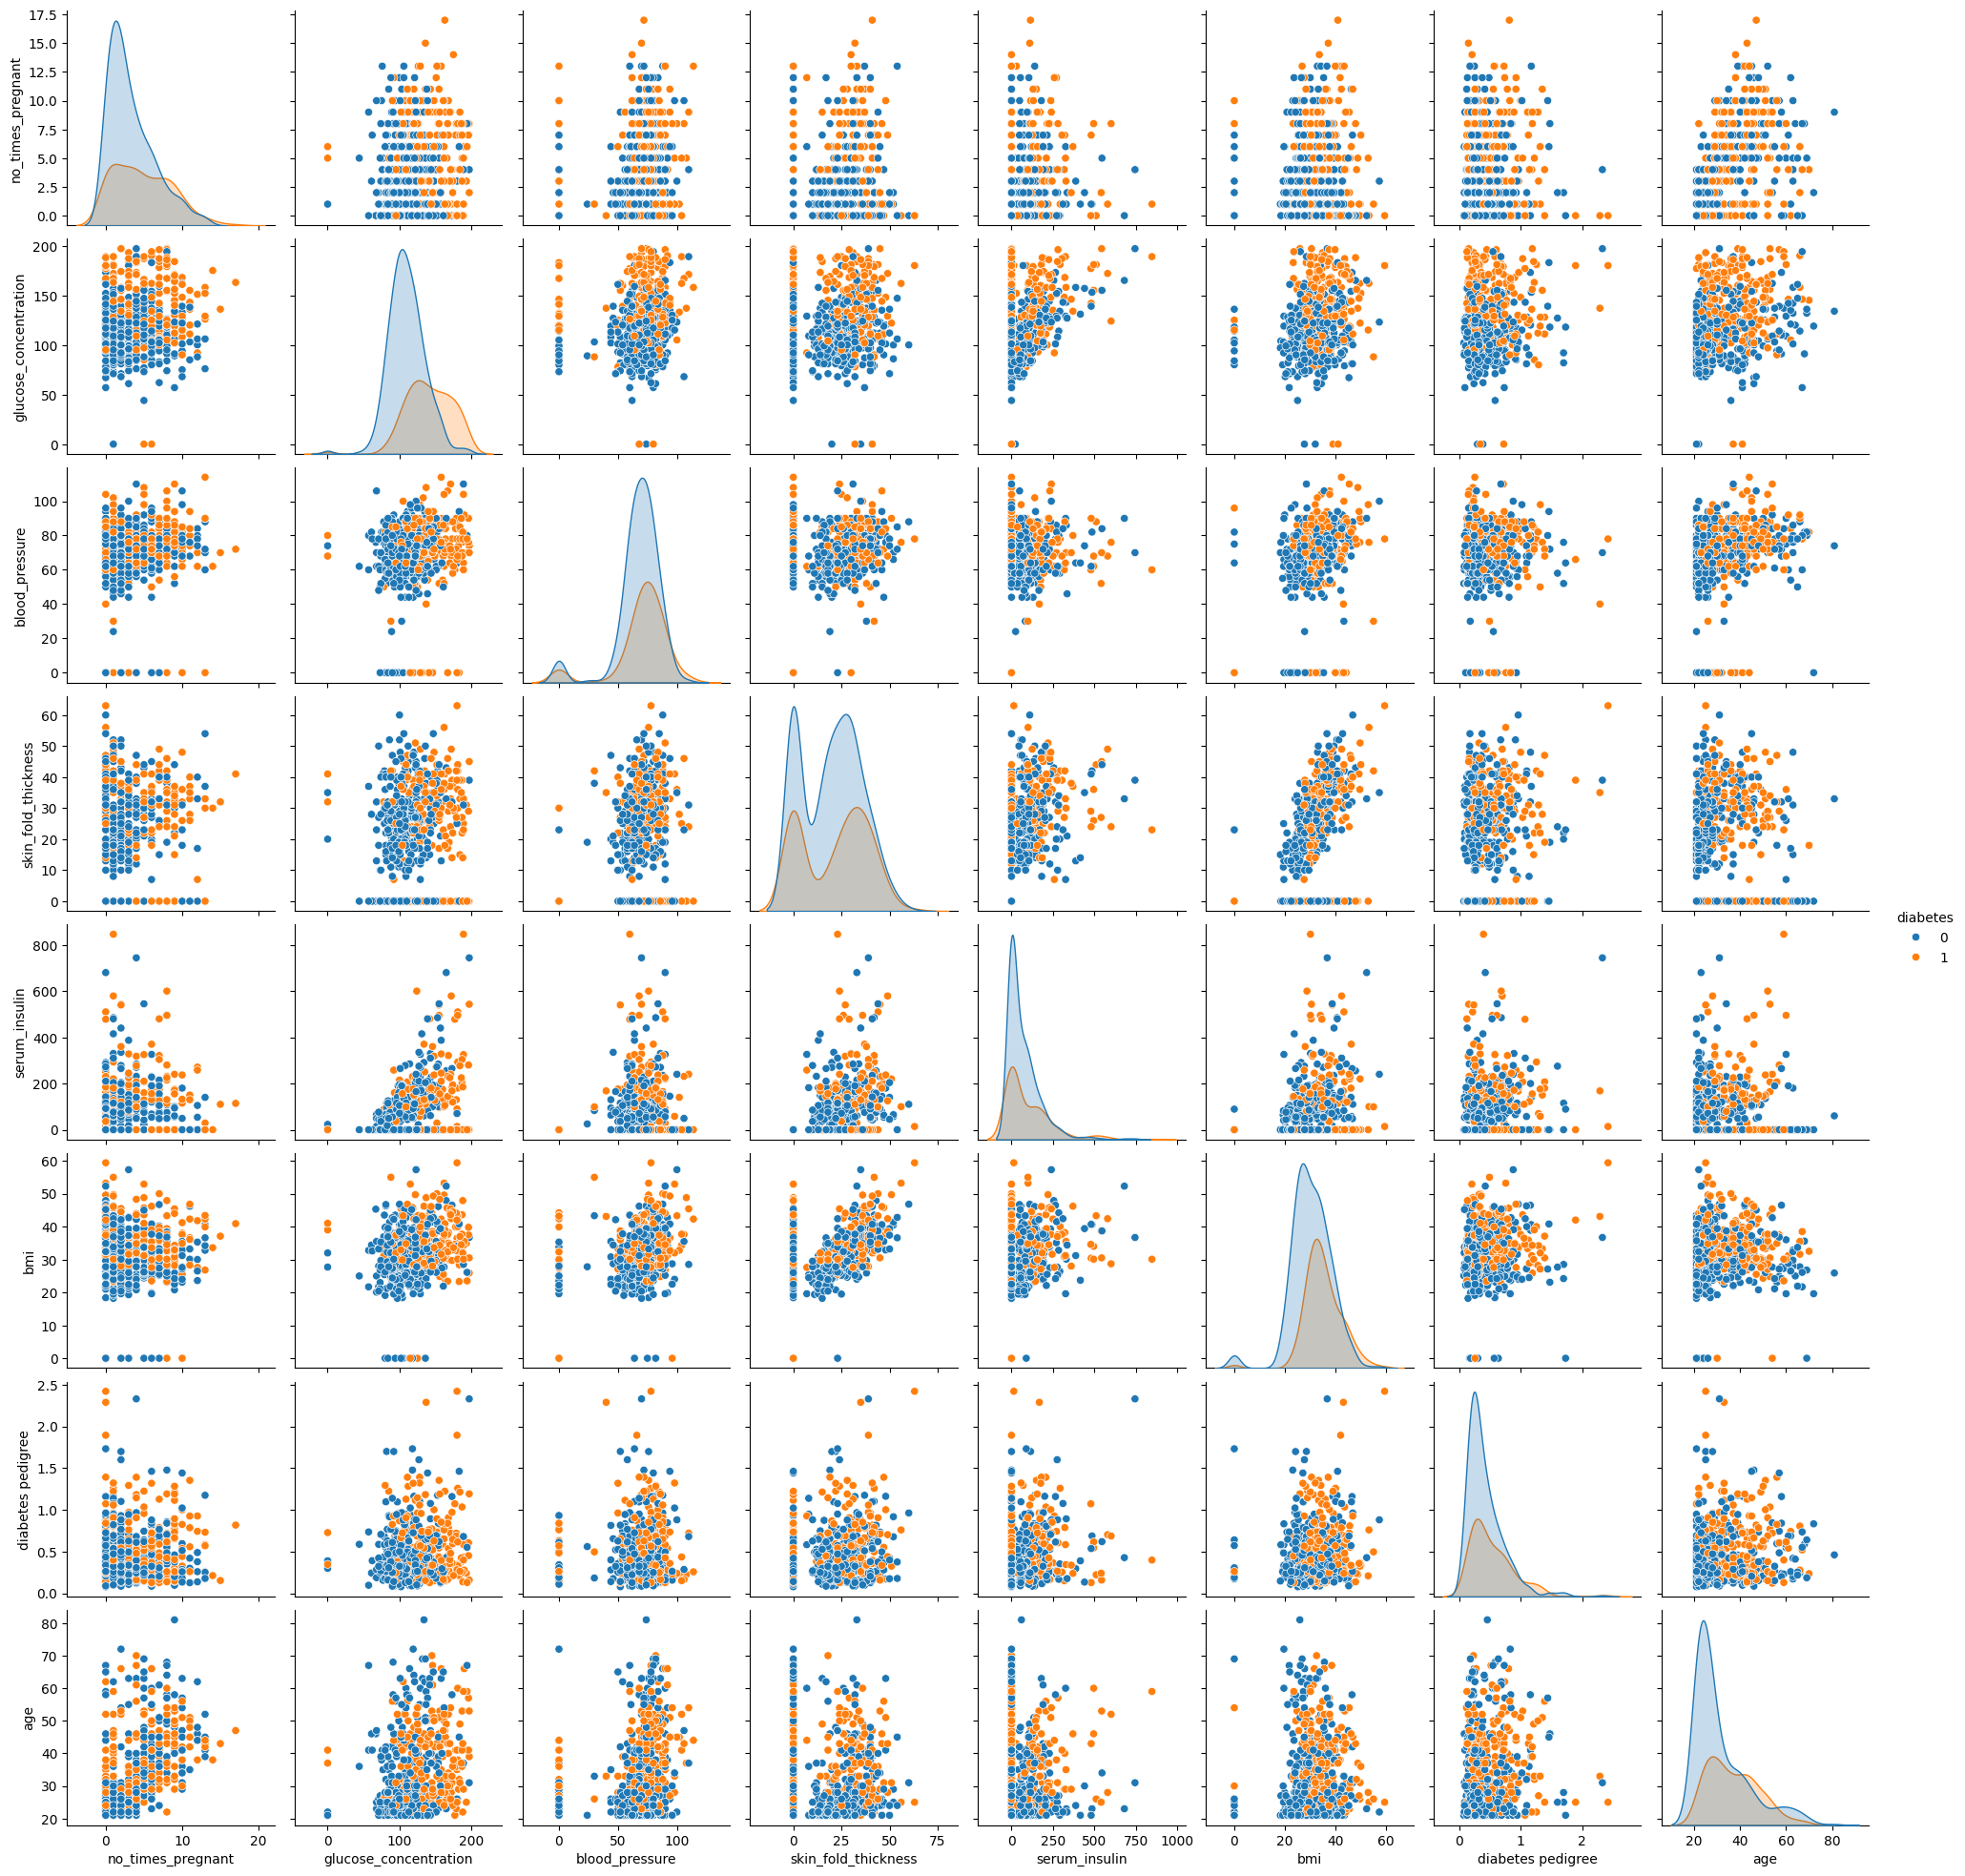

In [60]:
sns.pairplot(diabetes_data,hue="diabetes")
plt.show()


In [61]:
colume = ['glucose_concentration','blood_pressure','skin_fold_thickness','serum_insulin']
diabetes_data[colume] = diabetes_data[colume].replace(0,np.nan)

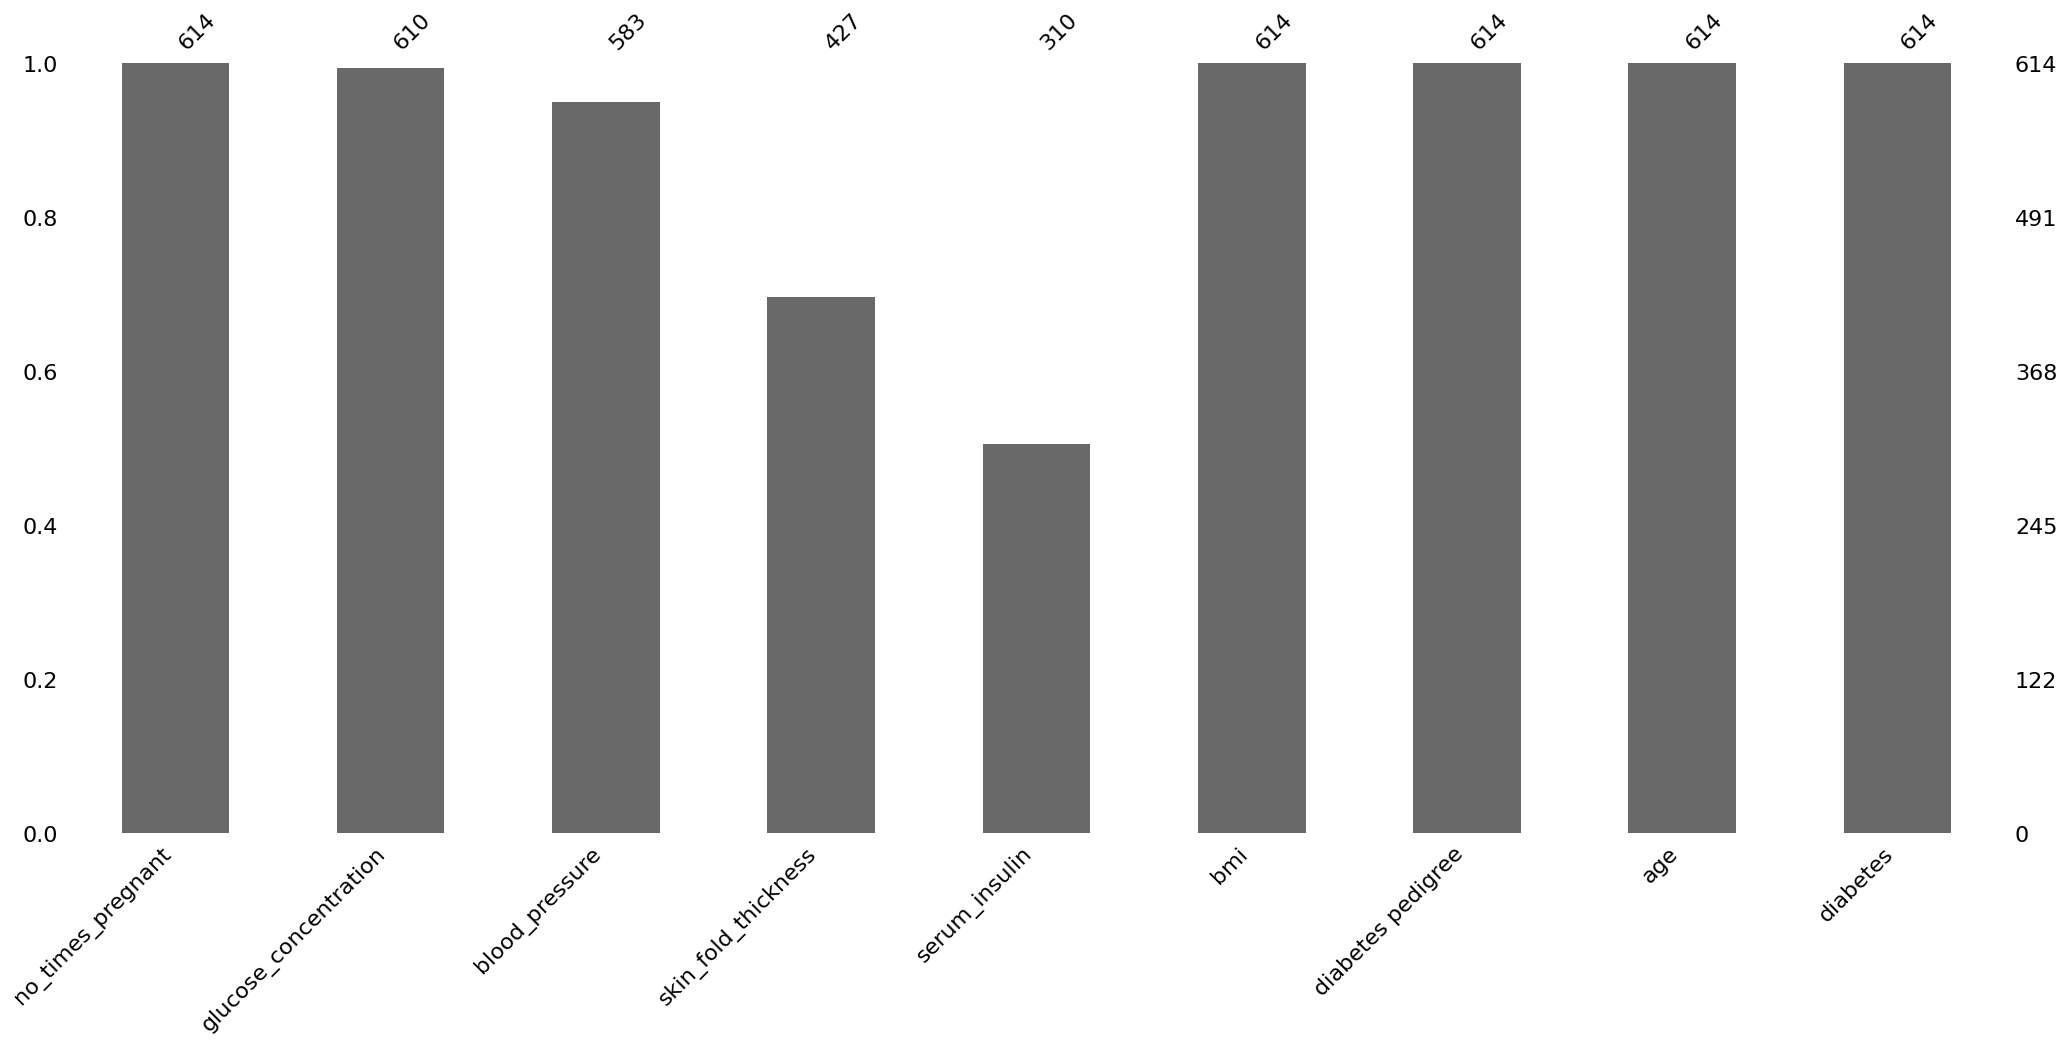

In [62]:
# use missingno function to find 'NaN'
import missingno as msno
msno.bar(diabetes_data)
plt.show()

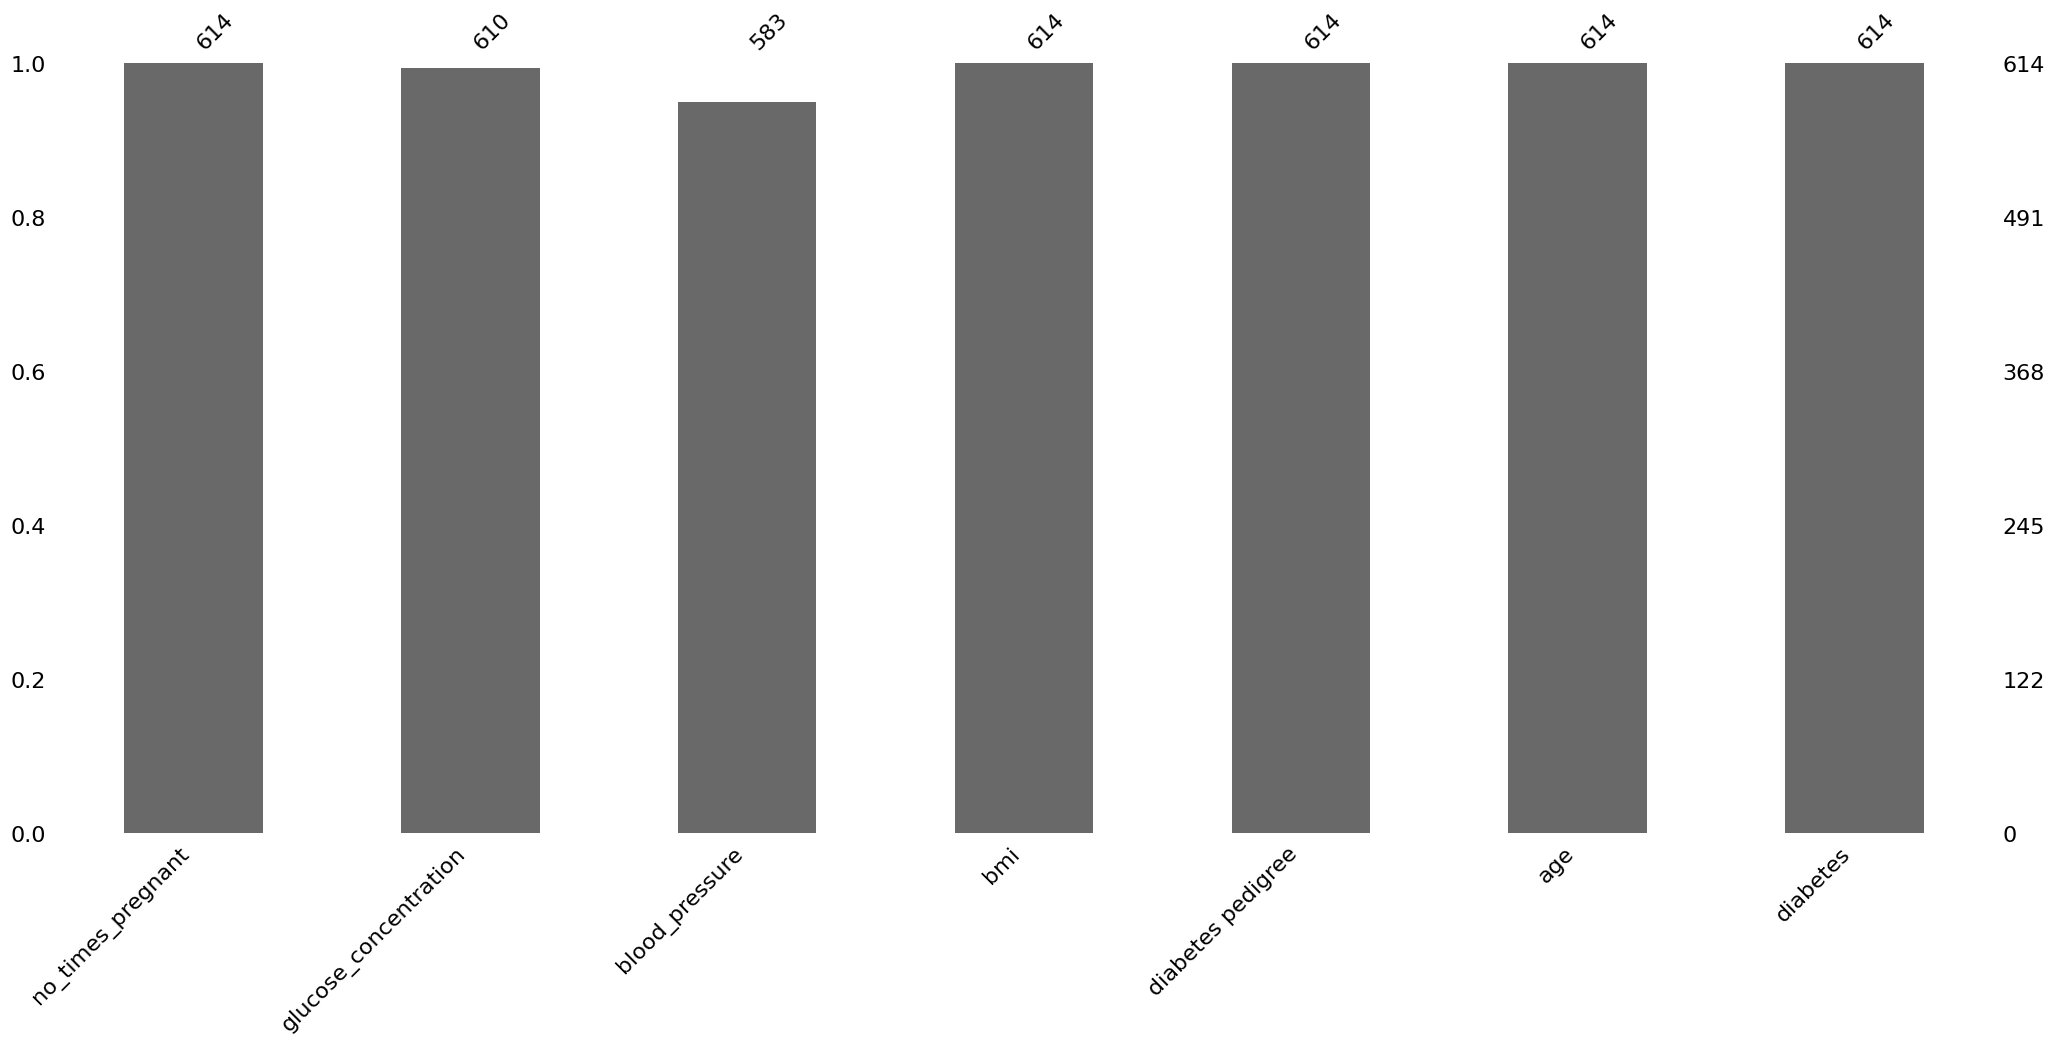

In [63]:
# drop skin_fold_thickness and serum_insulin
thresh_count = diabetes_data.shape[0]*0.8
diabetes_data = diabetes_data.dropna(thresh=thresh_count,axis=1)
msno.bar(diabetes_data)
plt.show()

In [64]:
# use sklearn SimpleImputer fill NaN
from sklearn.impute import SimpleImputer
imr = SimpleImputer()
colume_2 = ['glucose_concentration','blood_pressure']
diabetes_data[colume_2] = imr.fit_transform(diabetes_data[colume_2])


/tmp/ipykernel_11021/3725328597.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_data[colume_2] = imr.fit_transform(diabetes_data[colume_2])


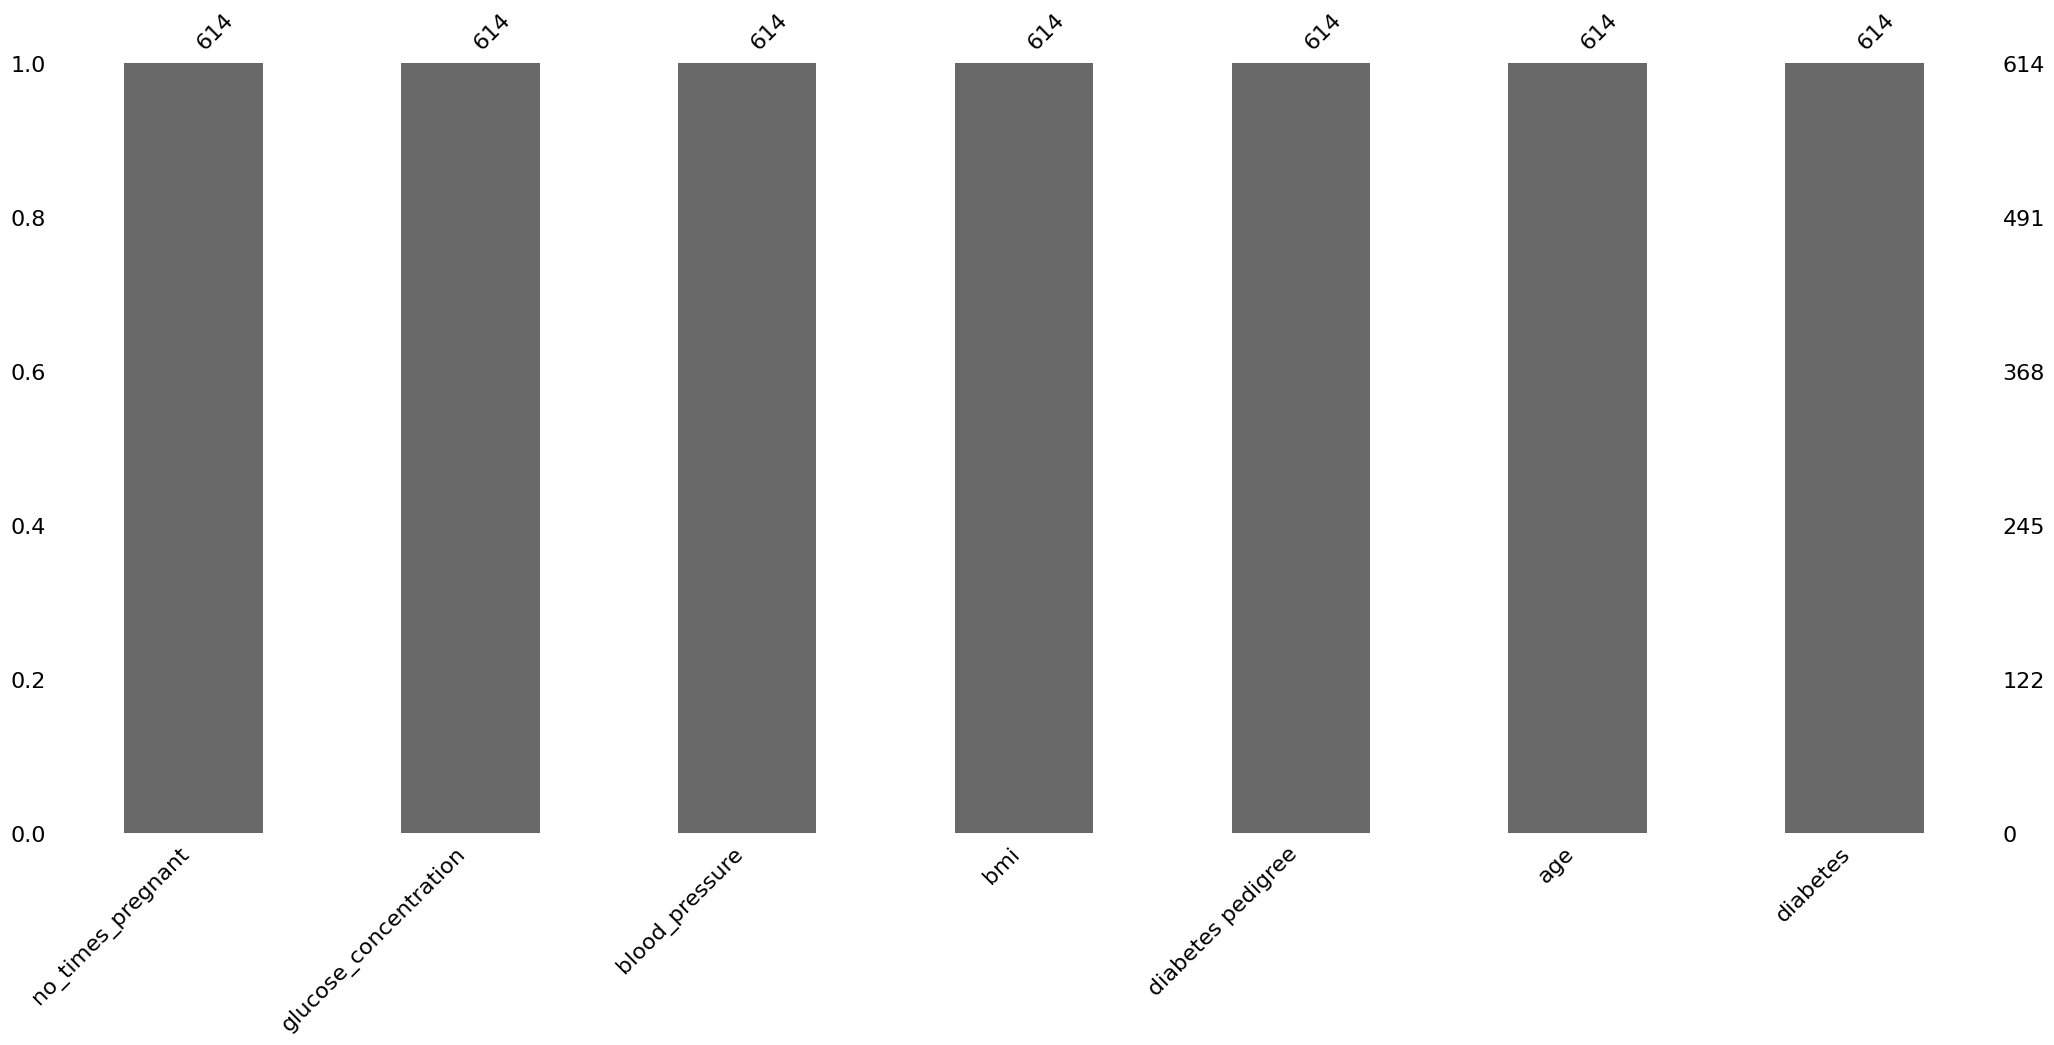

In [65]:
msno.bar(diabetes_data)
plt.show()

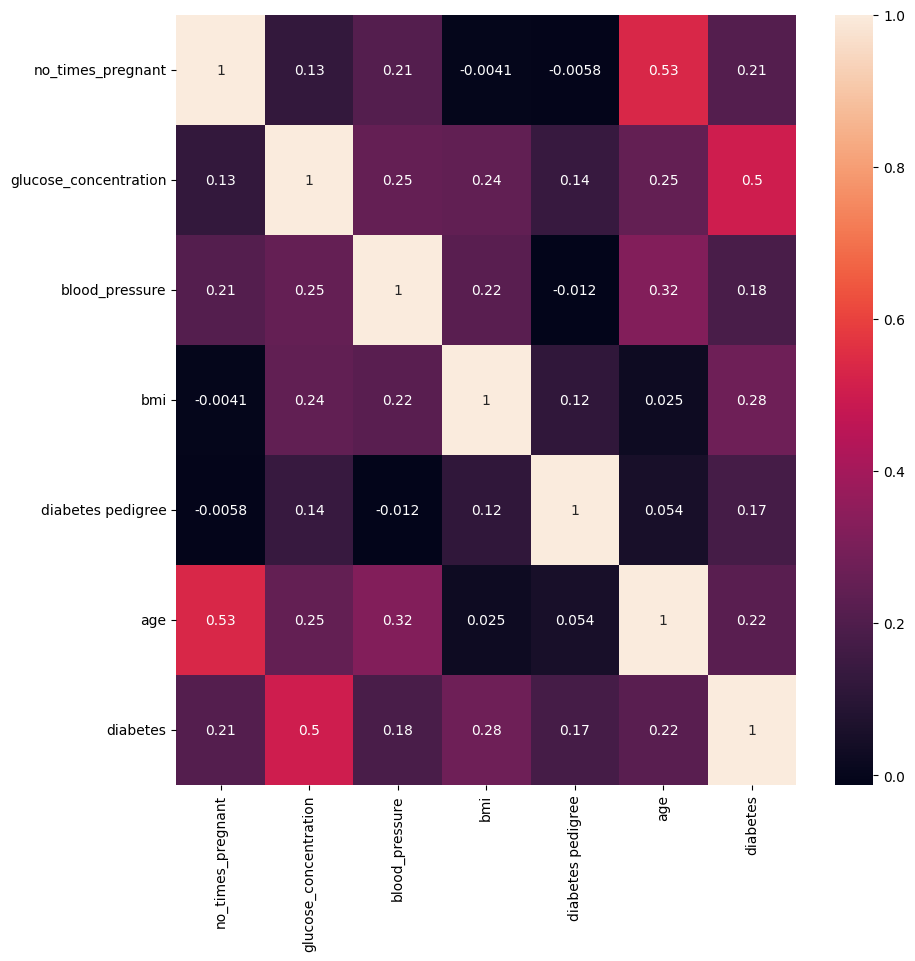

In [66]:
# check data coefficient
plt.figure(figsize=(10,10))
sns.heatmap(diabetes_data.corr(),annot=True)
plt.show()

In [67]:
# Load bunch of sklearn models
x = diabetes_data.drop('diabetes',axis=1)
y = diabetes_data['diabetes']

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y)


In [69]:
classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    MLPClassifier(hidden_layer_sizes=(20,20),max_iter=100),
    RandomForestClassifier(max_depth=5,min_samples_split=3),
    AdaBoostClassifier(),
    BaggingClassifier(),
    ]

log = []
for clf in classifiers:
    clf.fit(x_train,y_train)
    name = clf.__class__.__name__
    print('='*30)
    print(name)
    print('****Result****')
    predictions = clf.predict(x_test)
    acc = accuracy_score(y_test,predictions)
    print('Accuracy:{:.4%}'.format(acc))
    log.append([name,acc*100])

print('='*30)


KNeighborsClassifier
****Result****
Accuracy:76.7568%
LogisticRegression
****Result****
Accuracy:76.7568%


/home/hung/.local/share/virtualenvs/Artificial-Intelligence-with-Python-b-dnIHpW/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier
****Result****
Accuracy:71.3514%
RandomForestClassifier
****Result****
Accuracy:77.8378%
AdaBoostClassifier
****Result****
Accuracy:81.0811%
BaggingClassifier
****Result****
Accuracy:76.2162%


In [70]:
log = pd.DataFrame(log)
log.rename(columns = {0:'Classifier',1:'Accuracy'},inplace=True)
log


,Classifier,Accuracy
0,KNeighborsClassifier,76.756757
1,LogisticRegression,76.756757
2,MLPClassifier,71.351351
3,RandomForestClassifier,77.837838
4,AdaBoostClassifier,81.081081
5,BaggingClassifier,76.216216


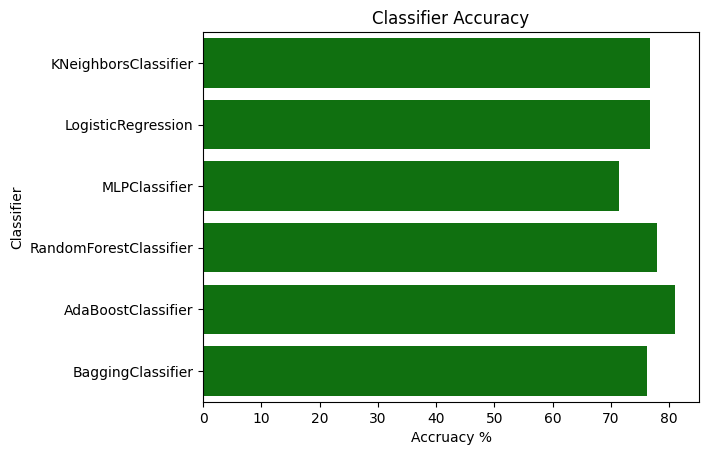

The best model is : Classifier    RandomForestClassifier
Accuracy                   81.081081
dtype: object


In [71]:
sns.barplot(x='Accuracy', y='Classifier',data=log,color='g')
plt.xlabel('Accruacy %')
plt.title('Classifier Accuracy')
plt.show()
print('The best model is :',log.max())


In [72]:
# Load test_data and make prediction
test_data = pd.read_csv('./diabetes/test.csv')
test_data


,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,437,12,140,85,33,0,37.4,0.244,41
1,411,6,102,90,39,0,35.7,0.674,28
2,639,7,97,76,32,91,40.9,0.871,32
3,213,7,179,95,31,0,34.2,0.164,60
4,181,6,87,80,0,0,23.2,0.084,32
...,...,...,...,...,...,...,...,...,...
149,178,0,129,110,46,130,67.1,0.319,26
150,662,1,199,76,43,0,42.9,1.394,22
151,159,2,88,74,19,53,29.0,0.229,22
152,298,0,126,84,29,215,30.7,0.520,24


In [73]:
# keep the size as same as diabetes_data
# drop columns →'p_id','skin_fold_thickness','serum_insulin'
x_test = test_data.drop(['p_id','skin_fold_thickness','serum_insulin'],axis=1)
x_test

,no_times_pregnant,glucose_concentration,blood_pressure,bmi,diabetes pedigree,age
0,12,140,85,37.4,0.244,41
1,6,102,90,35.7,0.674,28
2,7,97,76,40.9,0.871,32
3,7,179,95,34.2,0.164,60
4,6,87,80,23.2,0.084,32
...,...,...,...,...,...,...
149,0,129,110,67.1,0.319,26
150,1,199,76,42.9,1.394,22
151,2,88,74,29.0,0.229,22
152,0,126,84,30.7,0.520,24


In [74]:
sample_submission = pd.read_csv('./diabetes/sample_submission.csv')
sample_submission


,p_id,diabetes
0,437,0
1,411,0
2,639,0
3,213,0
4,181,0
...,...,...
149,178,0
150,662,0
151,159,0
152,298,0


In [75]:
x_test.shape, x_train.shape

((154, 6), (429, 6))

In [77]:
RT = RandomForestClassifier(max_depth=5,min_samples_split=3)
RT.fit(x_train,y_train)
fin_predictions = RT.predict(x_test)
fin_predictions

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [78]:
output = pd.DataFrame({'p_id':test_data.p_id,'diabetes':fin_predictions})
output.to_csv('./diabetes/my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Other references:
- https://www.kaggle.com/code/rozerksh/diabetics
- https://www.kaggle.com/code/skyscraper25/how-i-got-77-27-acuuracy-on-pima-diabetes-dataset
- https://www.kaggle.com/code/jagdish2386/understanding-confusion-matrix